# Basic Python

Introduction to some basic python data types.

In [ ]:
from __future__ import annotations

x = 1
y = 2.0
s = "hello"
l = [1, 2, 3, "a"]
d = {"a": 1, "b": 2, "c": 3}

Operations behave as per what you would expect.

In [ ]:
z = x * y
print(z)

2.0


In [ ]:
# Getting item at index 3 - note that Python uses zero-based indexing.
print(l[3])

# Getting the index of an element
print(l.index(2))

# Concatenating lists is just using the '+' operator.
print(l + l)

a
1
[1, 2, 3, 'a', 1, 2, 3, 'a']


Dictionaries are essentially key-value pairs

In [ ]:
print(d["c"])  # Getting the value associated with "c"

3


# Numpy and scipy

By convention, numpy is import as np and scipy is imported as sp.

In [ ]:
import numpy as np

An array is essentially a tensor. It can be an arbitrary number of dimensions. For simplicity, we will stick to basic 1D vectors and 2D matrices for now.

In [ ]:
x = np.array([[1, 2, 3], [4, 7, 6], [9, 4, 2]])
y = np.array([1.5, 0.5, 3])
print(x)
print(y)

[[1 2 3]
 [4 7 6]
 [9 4 2]]
[1.5 0.5 3. ]


By default, operations are element-wise.

In [ ]:
print(x + x)
print(x * x)
print(y * y)

[[ 2  4  6]
 [ 8 14 12]
 [18  8  4]]
[[ 1  4  9]
 [16 49 36]
 [81 16  4]]
[2.25 0.25 9.  ]


In [ ]:
print(np.dot(x, x))

[[36 28 21]
 [86 81 66]
 [43 54 55]]


In [ ]:
print(np.dot(x, y))

[11.5 27.5 21.5]


Or you can use the @ operator that is available in Python 3.7 onwards.

In [ ]:
print(x @ x)
print(x @ y)

[[36 28 21]
 [86 81 66]
 [43 54 55]]
[11.5 27.5 21.5]


Numpy also comes with standard linear algebra operations, such as getting the inverse.

In [ ]:
print(np.linalg.inv(x))

[[ 0.16949153 -0.13559322  0.15254237]
 [-0.77966102  0.42372881 -0.10169492]
 [ 0.79661017 -0.23728814  0.01694915]]


Eigen values and vectors

In [ ]:
print(np.linalg.eig(x))

EigResult(eigenvalues=array([12.50205135, -3.75787445,  1.2558231 ]), eigenvectors=array([[-0.27909662, -0.40149786,  0.3019769 ],
       [-0.79317124, -0.32770088, -0.78112084],
       [-0.5412804 ,  0.85522605,  0.54649811]]))


Use of numpy vectorization is key to efficient coding. Here we use the Jupyter %time magic function to demonstrate the relative speeds to two methods of calculation the L2 norm of a very long vector.

In [ ]:
r = np.random.rand(10000, 1)

In [ ]:
%time sum([i**2 for i in r])**0.5
%time np.sqrt(np.sum(r**2))
%time np.linalg.norm(r)

CPU times: user 5.49 ms, sys: 228 μs, total: 5.72 ms
Wall time: 5.69 ms
CPU times: user 34 μs, sys: 12 μs, total: 46 μs
Wall time: 40.3 μs
CPU times: user 20 μs, sys: 3 μs, total: 23 μs
Wall time: 25 μs


np.float64(58.26369629437483)

Scipy has all the linear algebra functions as numpy and more. Moreover, scipy is always compiled with fast BLAS and LAPACK.

In [ ]:
from scipy import linalg

linalg.inv(x)

array([[ 0.16949153, -0.13559322,  0.15254237],
       [-0.77966102,  0.42372881, -0.10169492],
       [ 0.79661017, -0.23728814,  0.01694915]])

In [ ]:
import scipy.constants as const

print(const.e)
print(const.h)

1.602176634e-19
6.62607015e-34


In [ ]:
from scipy import stats

In [ ]:
dist = stats.norm(0, 1)  # Gaussian distribution
dist.cdf(1.96)

np.float64(0.9750021048517795)

# Pandas

pandas is one of the most useful packages that you will be using extensively during this course. You should become very familiar with the Series and DataFrame objects in pandas. Here, we will read in a csv (comma-separated value) file downloaded from figshare. While you can certainly manually download the csv and just called pd.read_csv(filename), we will just use the request method to directly grab the file and read it in using a StringIO stream.

In [ ]:
import pandas as pd
from IPython.display import display

# Get the raw text of the data directly from the figshare url.
url = "https://ndownloader.figshare.com/files/13007075"
data = pd.read_csv(url)
display(data)

,Material compositions 1,Material compositions 2,Enorm (eV),E_raw (eV),Site2_MeltingT,Site1_MendeleevNumber,Site1_MiracleRadius,GSestFCClatcnt_max_value,Site2_BCCenergy_pa,Site1_BCCfermi,...,BCCenergy_pa_composition_average,MiracleRadius_min_value,MeltingT_min_value,NUnfilled_max_value,Site2_Group,Site1_CovalentRadii,Site2_NUnfilled,SpecificHeatCapacity_difference,Site1_Electronegativity,BCCenergy_pa_arithmetic_average
0,Ag,Ag,0.000000,1.824450,-0.531814,0.402504,0.263045,-0.626925,1.021337,-1.217816,...,1.386573,0.859808,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-1.057898,0.099471,1.386573
1,Ag,Co,-0.090142,1.734308,0.064051,0.402504,0.263045,-0.626925,-0.248457,-1.217816,...,0.484851,-0.730180,-0.046109,-0.801582,0.116318,0.690287,-0.391288,-0.388610,0.099471,0.484851
2,Ag,Cr,0.259139,2.083589,0.524584,0.402504,0.263045,-0.626925,-1.000991,-1.217816,...,-0.049547,-0.311762,-0.046109,0.315885,-0.649128,0.690287,0.576260,-0.287857,0.099471,-0.049547
3,Ag,Cu,-0.022200,1.802250,-0.394504,0.402504,0.263045,-0.626925,0.746249,-1.217816,...,1.191224,-0.646497,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-0.518150,0.099471,1.191224
4,Ag,Fe,0.317672,2.142122,0.112116,0.402504,0.263045,-0.626925,-0.637552,-1.217816,...,0.208542,-0.730180,-0.046109,-0.429093,-0.138831,0.690287,-0.068772,-0.287857,0.099471,0.208542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Zr,Nb,-0.067020,2.576100,1.161729,-1.610722,1.247007,0.428381,-1.176407,-1.115927,...,-1.390625,0.776124,1.441713,1.060864,-0.904276,1.735499,0.898777,-1.011120,-1.538087,-1.390625
404,Zr,Ta,0.153850,2.796970,1.765340,-1.610722,1.247007,0.428381,-1.700431,-1.115927,...,-1.762751,0.943491,1.441713,1.060864,-0.904276,1.735499,0.898777,-0.561330,-1.538087,-1.762751
405,Zr,Ti,0.248110,2.891230,0.257430,-1.610722,1.247007,0.428381,-0.451494,-1.115927,...,-0.875841,0.692440,1.130177,1.060864,-1.159425,1.735499,1.221293,-0.176309,-1.538087,-0.875841
406,Zr,Hf,0.204140,2.847260,0.888986,-1.610722,1.247007,0.428381,-1.081422,-1.115927,...,-1.323173,2.031377,1.441713,1.060864,-1.159425,1.735499,1.221293,-0.561330,-1.538087,-1.323173


Here, we will get one column from the DataFrame - this is a Pandas Series object.

In [ ]:
print(data["Enorm (eV)"])

0      0.000000
1     -0.090142
2      0.259139
3     -0.022200
4      0.317672
         ...   
403   -0.067020
404    0.153850
405    0.248110
406    0.204140
407    0.248040
Name: Enorm (eV), Length: 408, dtype: float64


In [ ]:
df = data[data["Enorm (eV)"] >= 0]
df.describe()

,Enorm (eV),E_raw (eV),Site2_MeltingT,Site1_MendeleevNumber,Site1_MiracleRadius,GSestFCClatcnt_max_value,Site2_BCCenergy_pa,Site1_BCCfermi,CovalentRadius_max_value,Site2_Density,...,BCCenergy_pa_composition_average,MiracleRadius_min_value,MeltingT_min_value,NUnfilled_max_value,Site2_Group,Site1_CovalentRadii,Site2_NUnfilled,SpecificHeatCapacity_difference,Site1_Electronegativity,BCCenergy_pa_arithmetic_average
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.491023,2.758123,0.630707,0.156606,0.283693,-0.337304,-0.602949,-0.159539,-0.029106,0.350137,...,-0.182394,0.225325,0.300945,0.012843,-0.327670,0.244180,0.188148,0.004969,-0.068448,-0.182394
std,0.456827,0.930181,0.811159,1.090180,1.049987,0.787956,0.828576,1.024175,0.821100,1.104672,...,0.824833,0.916557,0.903015,0.850170,0.677260,1.074293,0.788756,0.957366,1.125640,0.824833
min,0.000000,1.078800,-1.347640,-5.157834,-1.072333,-1.833204,-2.030510,-1.890525,-1.753901,-1.505302,...,-2.947855,-1.985434,-1.262013,-1.919050,-1.669722,-1.115079,-1.358836,-1.057898,-2.438744,-2.947855
25%,0.129350,2.088341,0.112116,0.114901,-0.088371,-0.860692,-1.176407,-1.115927,-0.645574,-0.468843,...,-0.741590,-0.646497,-0.548331,-0.429093,-0.904276,-0.830021,-0.391288,-0.662083,-0.773893,-0.741590
50%,0.346170,2.700374,0.527937,0.306636,0.052196,-0.600966,-0.691738,-0.558538,-0.313075,0.113355,...,-0.125189,0.190339,0.158538,-0.056604,-0.393979,0.310210,0.253744,-0.305849,0.044886,-0.125189
75%,0.744300,3.130163,1.161729,0.690108,1.247007,0.386296,-0.057758,0.913845,0.518170,1.294437,...,0.337856,0.608757,0.942007,0.688375,0.116318,0.880326,0.898777,0.564946,0.836372,0.337856
max,1.936200,6.069955,2.218049,1.936391,4.269179,2.115409,1.487181,2.029796,2.069829,2.395791,...,1.897242,5.629771,4.052277,1.433353,1.392060,4.491058,1.543809,2.151806,1.764322,1.897242


Pandas dataframes come with some conveience functions for quick visualization.

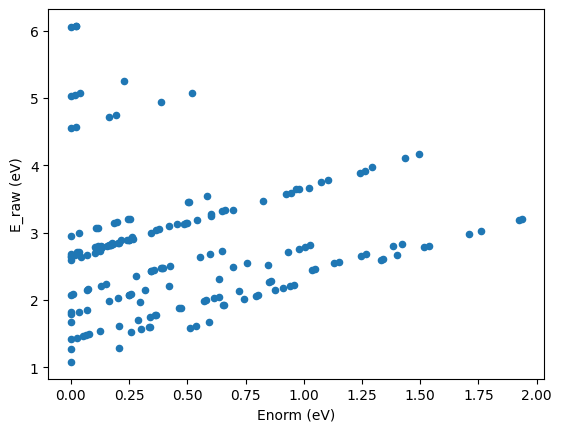

In [ ]:
df.plot(x="Enorm (eV)", y="E_raw (eV)", kind="scatter");

# Seaborn

Here we demonstrate some basic statistical data visualization using the seaborn package. A helpful resource is the [seaborn gallery](https://seaborn.pydata.org/examples/index.html) which has many useful examples with source code.

In [ ]:
import seaborn as sns

%matplotlib inline

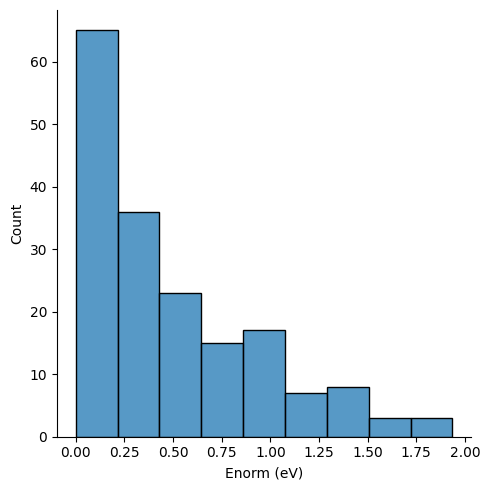

In [ ]:
sns.displot(df["Enorm (eV)"]);

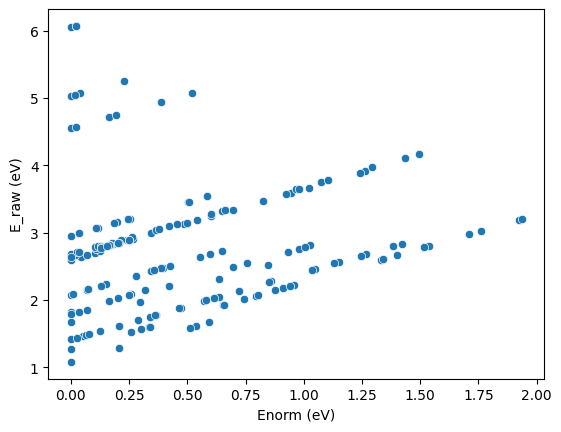

In [ ]:
sns.scatterplot(x="Enorm (eV)", y="E_raw (eV)", data=df);

# Materials API using pymatgen

First, if you are running this notebook after you have installed Python and the required libraries on your laptop, you can skip the next cell. If you are running this in Google Colab, you will need to install pymatgen manually. Google Colab already comes pre-installed with most of the data science packages we will be using, but pymatgen is not installed by default.

In [ ]:
# For Python newbies, any line starting with # is a comment line that is ignored by the interpreter.
# If you are using Google Colab, uncomment the next few lines (by removing the #) and run this cell.
# Important: Once the install completes, you will need to restart the runtime in Google Colab to use
# it!

# !pip install pymatgen>=2023.10.4

## Here, we are mounting Google Drive so that we can load the Materials API key from a json file stored there.
## This avoids leaking API keys.

# from google.colab import drive

# drive.mount('/content/drive')

# import json

# with open("/content/drive/MyDrive/mapi.json") as f:
#   d = json.load(f)

In [ ]:
from pymatgen.ext.matproj import MPRester

with MPRester() as mpr:
    data = mpr.summary.search(
        formula=["Fe2O3"],
        _fields=[
            "material_id",
            "formula_pretty",
            "formation_energy_per_atom",
            "band_gap",
        ],
    )
# What is returned is a list. Let's just see what the first item in the list looks out.
import pprint

pprint.pprint(data[0])

{'band_gap': 0.220199999999999,
 'formation_energy_per_atom': -1.417581733999999,
 'formula_pretty': 'Fe2O3',
 'material_id': 'mp-1244869'}


The above is not very friendly for manipulation and visualization. Thankfully, we can easily convert this to a pandas DataFrame since the DataFrame constructor takes in lists of dicts as well.

In [ ]:
df = pd.DataFrame(data)
display(df)

,formula_pretty,material_id,formation_energy_per_atom,band_gap
0,Fe2O3,mp-1244869,-1.417582,0.2202
1,Fe2O3,mp-1244911,-1.433196,0.2832
2,Fe2O3,mp-1245019,-1.418439,1.1378
3,Fe2O3,mp-1245078,-1.401270,1.1123
4,Fe2O3,mp-1245084,-1.154974,0.1211
5,Fe2O3,mp-1245154,-1.386215,0.3798
6,Fe2O3,mp-1245277,-1.362796,0.3018
7,Fe2O3,mp-685153,-1.481734,0.9977
8,Fe2O3,mp-776606,-1.584070,0.0000
9,Fe2O3,mp-557546,-1.179294,0.0000


Oftentimes, you only want the subset of data with valid values. In the above data, it is clear that some of the entries do not have elasticity.K_VRH data. So we will use the dropna method of the pandas DataFrame to get a new DataFrame with just valid data. Note that a lot of Pandas methods returns a new DataFrame. This ensures that you always have the original object to compare to. If you want to perform the operation in place, you can usually supply  `inplace=True` to the method.

In [ ]:
valid_data = df.dropna()
print(valid_data)

   formula_pretty material_id  formation_energy_per_atom  band_gap
0           Fe2O3  mp-1244869                  -1.417582    0.2202
1           Fe2O3  mp-1244911                  -1.433196    0.2832
2           Fe2O3  mp-1245019                  -1.418439    1.1378
3           Fe2O3  mp-1245078                  -1.401270    1.1123
4           Fe2O3  mp-1245084                  -1.154974    0.1211
5           Fe2O3  mp-1245154                  -1.386215    0.3798
6           Fe2O3  mp-1245277                  -1.362796    0.3018
7           Fe2O3   mp-685153                  -1.481734    0.9977
8           Fe2O3   mp-776606                  -1.584070    0.0000
9           Fe2O3   mp-557546                  -1.179294    0.0000
10          Fe2O3   mp-716814                  -1.204043    0.0000
11          Fe2O3  mp-1181824                  -1.538965    1.6877
12          Fe2O3    mp-19770                  -1.707091    0.0000
13          Fe2O3   mp-565814                  -1.635792    1.

Seaborn works very well with Pandas DataFrames...

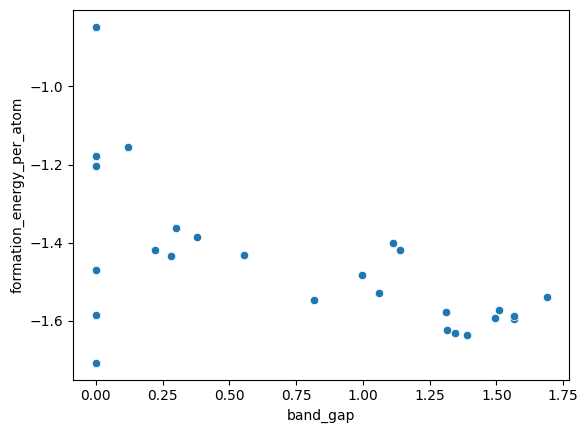

In [ ]:
sns.scatterplot(x="band_gap", y="formation_energy_per_atom", data=valid_data);